# Setup and Load Dataset

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, HDBSCAN, KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets

In [2]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    # The probability of a point belonging to its labeled cluster determines
    # the size of its marker
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_index = np.where(labels == k)[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

In [3]:
iris = datasets.load_iris()

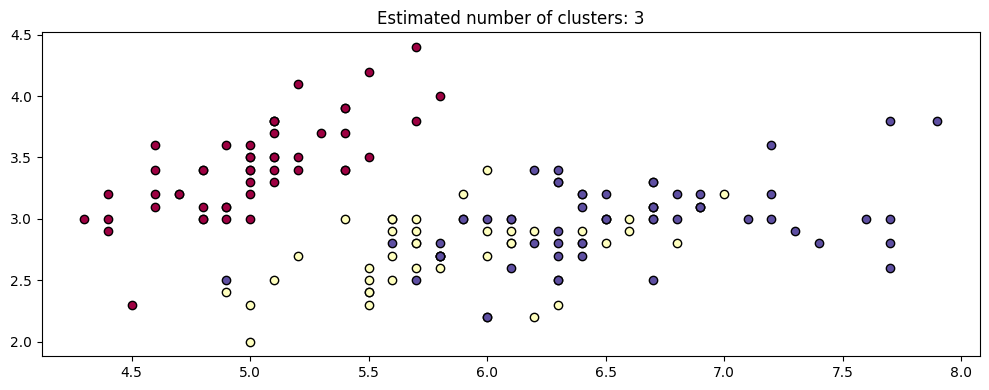

In [4]:
plot(iris.data, labels=iris.target)

# DBSCAN

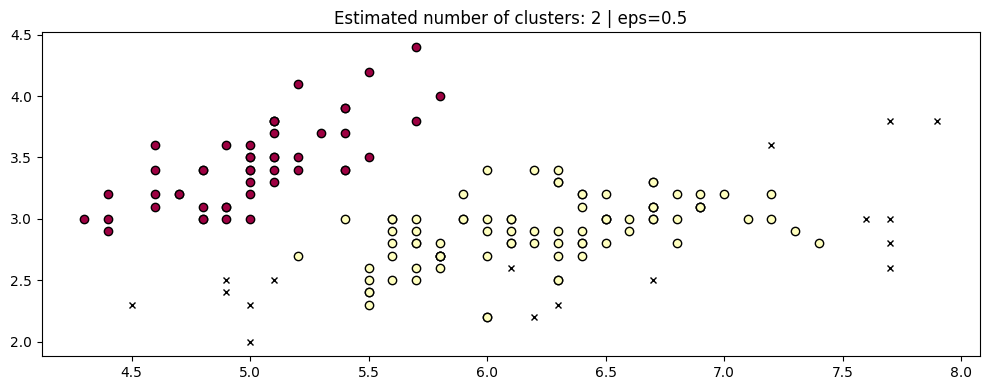

In [16]:
dbs = DBSCAN(eps=0.5)
dbs.fit(iris.data)
plot(iris.data, dbs.labels_, parameters={"eps": 0.5})

# HDBSCAN

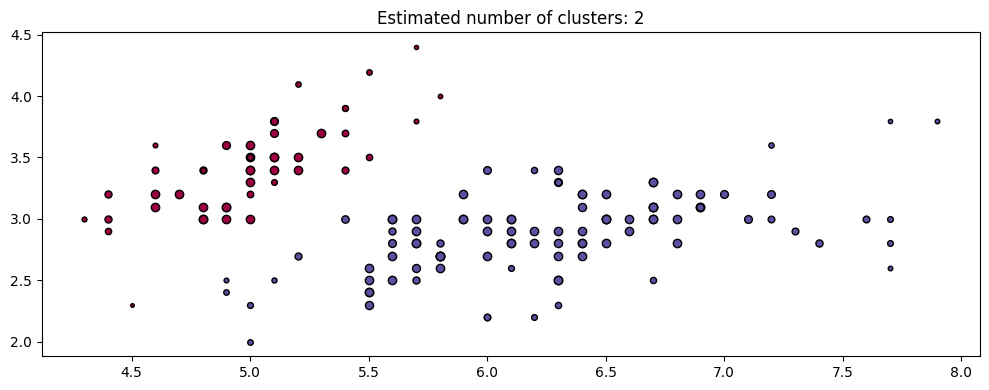

In [19]:
hdb = HDBSCAN()
hdb.fit(iris.data)
plot(iris.data, hdb.labels_, hdb.probabilities_)

# K-Means

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris.data)

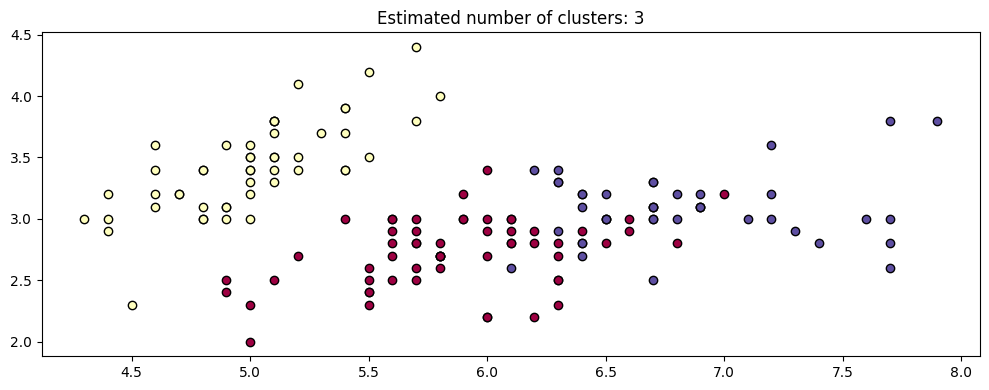

In [22]:
plot(iris.data, y_kmeans)